In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import matplotlib as mpl

In [2]:
from metamod.utils import ResultsManager, single_task_plot, task_switch_plot, cat_assimilation_plot, task_engagement_plot, \
    load_single_layer_vars, single_neuron_param_plot, SingleLayerManager, single_neuron_baseline_plot, class_prop_plot, \
    task_modulation_plot
plt.rcParams['text.usetex'] = True

# Single neuron results

In [3]:
results_path = "../results/testing_square_loss_single_neuron_22-01-2023_19-56-03-009"
result_manager = SingleLayerManager(results_path)

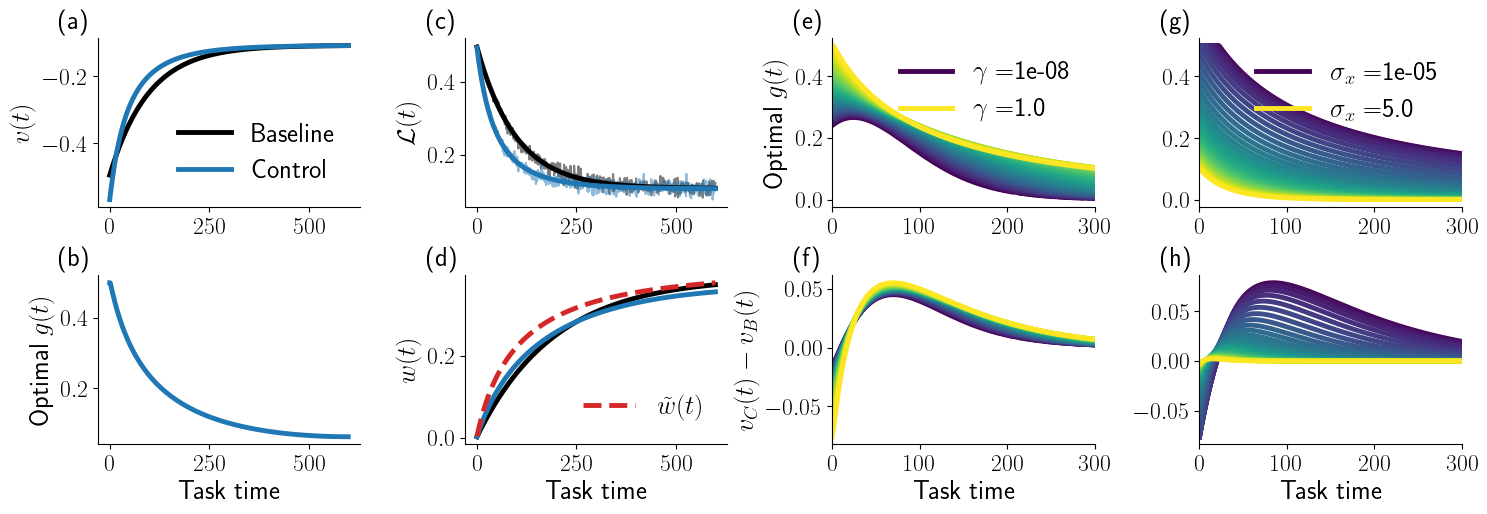

In [10]:
figsize = np.array((16, 6/5*4))*1.1
fontsize = 19
line_width = 3.5
subplot_labels = np.array([["(a)", "(c)"], ["(b)", "(d)"]])
f, ax = plt.subplots(2, 4, figsize=figsize)
ax1 = ax[:, :2]
ax2 = ax[:, 2:]

single_neuron_baseline_plot(result_manager, ax=ax1, 
                            figsize=figsize, fontsize=fontsize, 
                            line_width=line_width, subplot_labels=subplot_labels)

results_per_var, ranges = load_single_layer_vars()
line_width = 3.5
selected_vars = ["gamma", "sigmas"]
var_label = [r"$\gamma=$", r"$\sigma_{x}=$"]
x_lim_vars = [(0, 300), (0, 300)]
subplot_labels = np.array([["(e)", "(g)"], ["(f)", "(h)"]])

single_neuron_param_plot(results_per_var, ax=ax2, figsize=figsize, 
                         fontsize=fontsize, line_width=line_width, selected_vars=selected_vars,
                         x_lim_vars=x_lim_vars, var_label=var_label, subplot_labels=subplot_labels)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.savefig("paper_v2/single_neuron_results.pdf", bbox_inches="tight")
# f.tight_layout()

# Gain modulation 

### Results from ../results/task_switch_less_reg_longer/slow_switch_run0_AffineCorrelatedGaussian_18-01-2023_19-32-18-232 ###
### Param Keys ###
--- dataset_params ---
dataset1_params, dataset2_params, dataset_classes, change_tasks_every, dataset
--- model_params ---
learning_rate, hidden_dim, intrinsic_noise, reg_coef, W1_0, W2_0, input_dim, output_dim, model
--- equation_params ---
in_cov, out_cov, in_out_cov, init_weights, n_steps, reg_coef, intrinsic_noise, learning_rate, change_task_every, time_constant, solver
--- control_params ---
control_lower_bound, control_upper_bound, gamma, cost_coef, reward_convertion, init_g, control_lr, in_cov, out_cov, in_out_cov, init_weights, n_steps, reg_coef, intrinsic_noise, learning_rate, change_task_every, time_constant, iters_control, control
--- reset_model_params ---
learning_rate, hidden_dim, intrinsic_noise, reg_coef, W1_0, W2_0, input_dim, output_dim, model
### Results Keys ###
dict_keys(['iters', 'Loss_t_sim', 'weights_sim', 'weights_iter

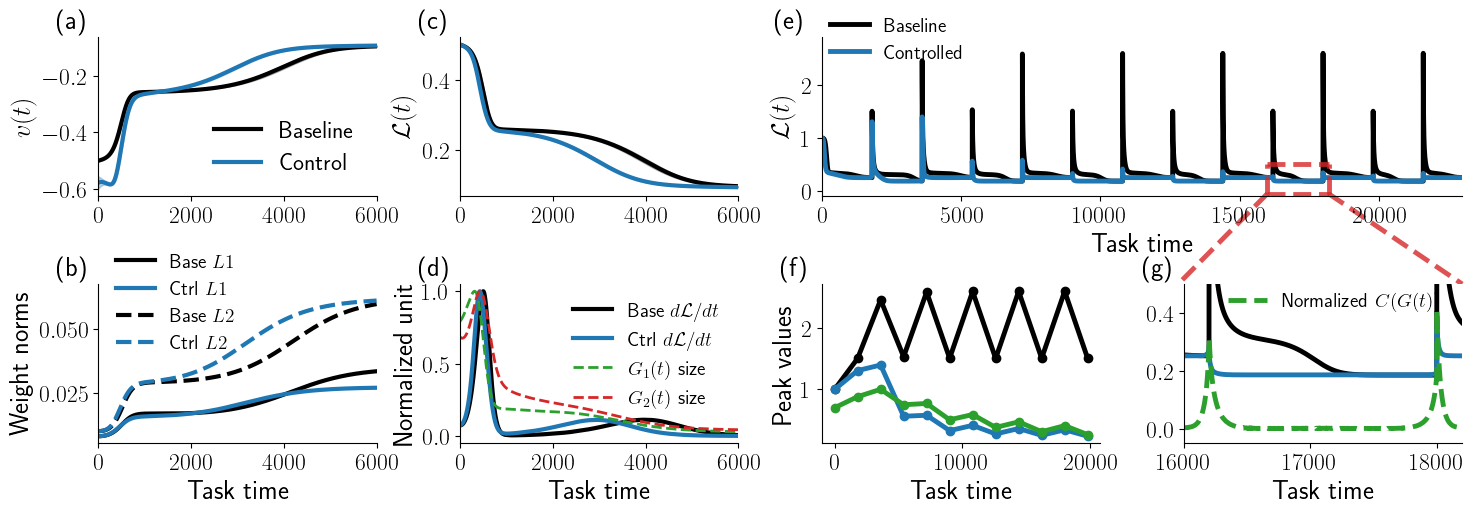

In [9]:
mnist_dir_list = glob.glob("../results/single_task_more_iters/run_id_*_MNIST*")
results = []
for result_dir in mnist_dir_list:
    results.append(ResultsManager(result_dir))

figsize = np.array((16, 6/5*4))*1.1
fontsize = 19
reduce_fontsize = 5
# weight_norm_ylim = (0, 0.1)
weight_legend_pos = (0, 1.3)

f = plt.figure(figsize=figsize)
hspace = 0.55
gs = mpl.gridspec.GridSpec(2, 4, wspace=0.3, hspace=hspace) 

ax_0 = f.add_subplot(gs[0, 0])  
ax_1 = f.add_subplot(gs[0, 1])  
ax_2 = f.add_subplot(gs[1, 0])  
ax_3 = f.add_subplot(gs[1, 1])
ax0 = f.add_subplot(gs[0, 2:])  # full first row
ax1 = f.add_subplot(gs[1, 2])  # second row, first col
ax2 = f.add_subplot(gs[1, 3])

ax = np.array([ax_0, ax_1, ax_2, ax_3])

subplot_labels = np.array([["(a)", "(c)"], ["(b)", "(d)"]])
subplot_labels = subplot_labels.flatten()

ax = single_task_plot(results, ax=ax, fontsize=fontsize, line_width=3, x_lim=(0, 6000), 
                      skip_xlabel=True, label_in_title=False, subplot_labels=subplot_labels,
                      reduce_fontsize=reduce_fontsize, weight_legend_pos=weight_legend_pos)

results_path = "../results/task_switch_less_reg_longer/slow_switch_run0_AffineCorrelatedGaussian_18-01-2023_19-32-18-232"

results = ResultsManager(results_path, verbose=True)

line_width = 3.5
zoom_xlim = (16000, 18200)
zoom_ylim = (-0.05, 0.5)
subplot_labels = np.array(["(e)", "(f)", "(g)"])
hspace = 0.55
legend_pos = (0, 1.17)
legend_pos2 = (0.13, 1)
line_pos_y = 1.75


task_switch_plot(results, ax0=ax0, ax1=ax1, ax2=ax2, 
                 figsize=figsize, fontsize=fontsize, line_width=line_width, 
                 zoom_xlim=zoom_xlim, zoom_ylim=zoom_ylim, subplot_labels=subplot_labels, 
                 hspace=hspace, legend_pos=legend_pos, legend_pos2=legend_pos2, line_pos_y=line_pos_y,
                 reduce_fontsize=reduce_fontsize)

plt.savefig("paper_v2/gain_modulation_results.pdf", bbox_inches="tight")
# f.tight_layout()
plt.show()